In [1]:
import numpy as np

# Zakres współrzędnych dla Warszawy
lat_min, lat_max = 52.0, 52.4
lon_min, lon_max = 20.8, 21.3

# Ustalmy rozdzielczość siatki
lat_points = np.linspace(lat_min, lat_max, num=10)
lon_points = np.linspace(lon_min, lon_max, num=10)

# Tworzymy siatkę współrzędnych
grid_points = [(lat, lon) for lat in lat_points for lon in lon_points]


In [2]:
import requests
import json
from datetime import datetime

# Funkcja do pobierania danych pogodowych
def get_weather_data(lat, lon, start_date, end_date):
    url = f"https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m"
    response = requests.get(url)
    data = response.json()
    return data

# Okres czasu do pobrania danych
start_date = "2021-06-01"
end_date = "2021-06-02"

# Pobieramy dane dla każdej lokalizacji
weather_data = {}
for lat, lon in grid_points:
    weather_data[(lat, lon)] = get_weather_data(lat, lon, start_date, end_date)


In [3]:
# Funkcja do obliczania średniej temperatury
def calculate_average_temperature(data):
    temperatures = data['hourly']['temperature_2m']
    avg_temperature = sum(temperatures) / len(temperatures)
    return avg_temperature

# Przetwarzamy dane, aby uzyskać średnie temperatury
average_temperatures = {}
for (lat, lon), data in weather_data.items():
    average_temperatures[(lat, lon)] = calculate_average_temperature(data)


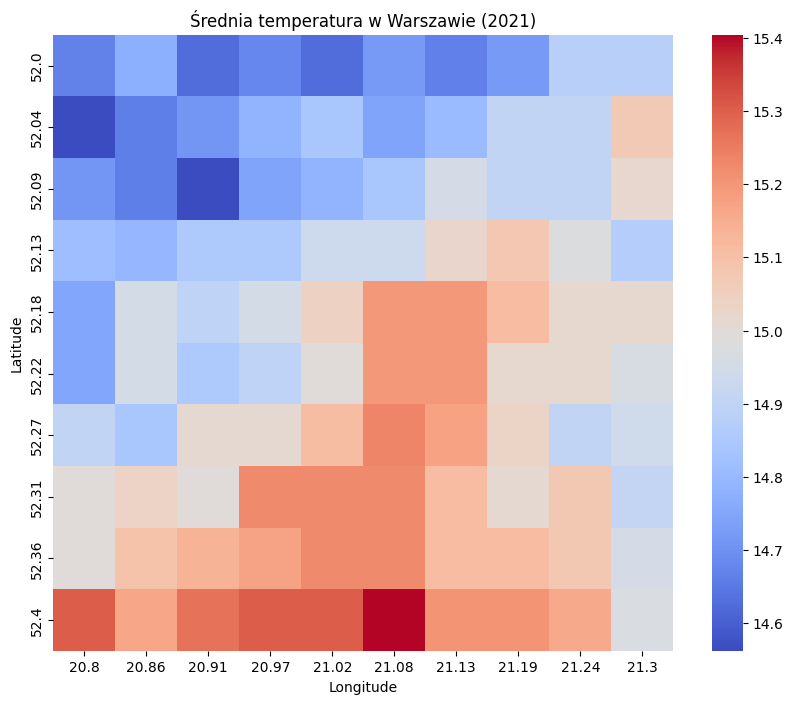

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Przekształcamy dane do formatu tablicowego
heatmap_data = np.zeros((len(lat_points), len(lon_points)))
for i, lat in enumerate(lat_points):
    for j, lon in enumerate(lon_points):
        heatmap_data[i, j] = average_temperatures[(lat, lon)]

# Tworzymy mapę ciepła
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, xticklabels=np.round(lon_points, 2), yticklabels=np.round(lat_points, 2), cmap="coolwarm")
plt.title("Średnia temperatura w Warszawie (2021)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


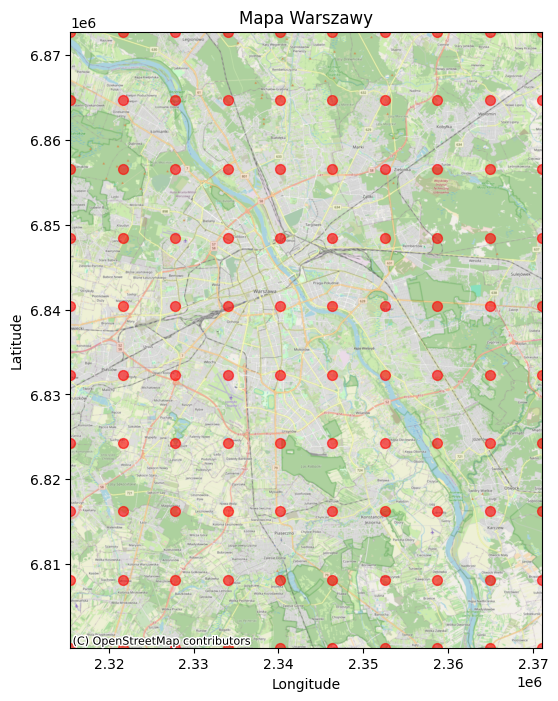

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

# Zakres współrzędnych dla Warszawy
lat_min, lat_max = 52.0, 52.4
lon_min, lon_max = 20.8, 21.3

# Ustalmy rozdzielczość siatki
lat_points = np.linspace(lat_min, lat_max, num=10)
lon_points = np.linspace(lon_min, lon_max, num=10)

# Tworzymy siatkę współrzędnych
grid_points = [(lat, lon) for lat in lat_points for lon in lon_points]

# Tworzymy GeoDataFrame do przechowywania punktów
points = [Point(lon, lat) for lat, lon in grid_points]
gdf = gpd.GeoDataFrame(geometry=points)

# Konwertujemy współrzędne geograficzne na metryczne
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Tworzymy mapę
fig, ax = plt.subplots(figsize=(10, 8))

# Ustawiamy zakres osi
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Dodajemy mapę tła z odpowiednim poziomem zoomu
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Dodajemy punkty
gdf.plot(ax=ax, color='red', markersize=50, alpha=0.6)

# Dodajemy tytuł i etykiety
plt.title("Mapa Warszawy")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


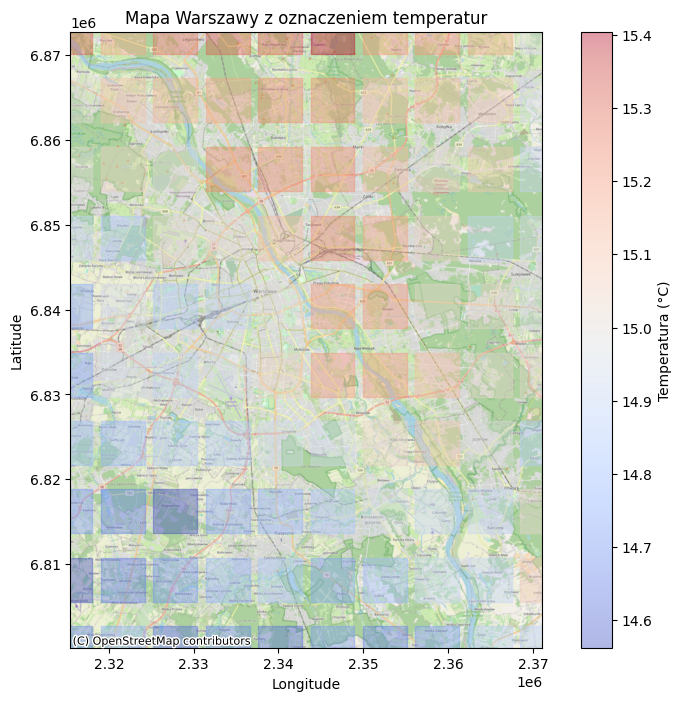

In [34]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

# Zakres współrzędnych dla Warszawy
lat_min, lat_max = 52.0, 52.4
lon_min, lon_max = 20.8, 21.3

# Ustalmy rozdzielczość siatki
lat_points = np.linspace(lat_min, lat_max, num=10)
lon_points = np.linspace(lon_min, lon_max, num=10)

# Tworzymy siatkę współrzędnych
grid_points = [(lat, lon) for lat in lat_points for lon in lon_points]

# Tworzymy GeoDataFrame do przechowywania punktów
points = [Point(lon, lat) for lat, lon in grid_points]
gdf = gpd.GeoDataFrame(geometry=points)

# Konwertujemy współrzędne geograficzne na metryczne
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Tworzymy mapę
fig, ax = plt.subplots(figsize=(10, 8))

# Ustawiamy zakres osi
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Dodajemy mapę tła z odpowiednim poziomem zoomu
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Dodajemy punkty z odcieniami kolorów odpowiadającymi temperaturom
temperatures = [average_temperatures[(lat, lon)] for lat, lon in grid_points]
sc = ax.scatter([point.x for point in gdf.geometry], [point.y for point in gdf.geometry], c=temperatures, cmap='coolwarm', s=1000, alpha=0.4, marker='s')

# Dodajemy legendę
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Temperatura (°C)')

# Dodajemy tytuł i etykiety
plt.title("Mapa Warszawy z oznaczeniem temperatur")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


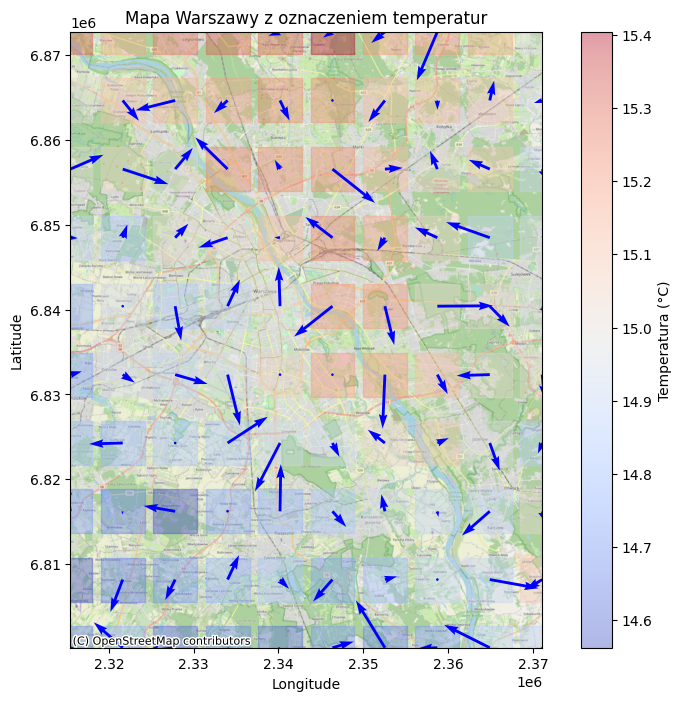

In [32]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

# Zakres współrzędnych dla Warszawy
lat_min, lat_max = 52.0, 52.4
lon_min, lon_max = 20.8, 21.3

# Ustalmy rozdzielczość siatki
lat_points = np.linspace(lat_min, lat_max, num=10)
lon_points = np.linspace(lon_min, lon_max, num=10)

# Tworzymy siatkę współrzędnych
grid_points = [(lat, lon) for lat in lat_points for lon in lon_points]

# Tworzymy GeoDataFrame do przechowywania punktów
points = [Point(lon, lat) for lat, lon in grid_points]
gdf = gpd.GeoDataFrame(geometry=points)

# Konwertujemy współrzędne geograficzne na metryczne
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Tworzymy mapę
fig, ax = plt.subplots(figsize=(10, 8))

# Ustawiamy zakres osi
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Dodajemy mapę tła z odpowiednim poziomem zoomu
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Dodajemy punkty z odcieniami kolorów odpowiadającymi temperaturom
temperatures = [average_temperatures[(lat, lon)] for lat, lon in grid_points]
sc = ax.scatter([point.x for point in gdf.geometry], [point.y for point in gdf.geometry], c=temperatures, cmap='coolwarm', s=1000, alpha=0.4, marker='s')

##
wind_directions = np.random.uniform(0, 360, len(grid_points))  # kierunek wiatru w stopniach
wind_speeds = np.random.uniform(0, 10, len(grid_points))  # siła wiatru w m/s

# Skalujemy długość strzałek proporcjonalnie do siły wiatru
scale_factor = 100  # czynnik skali
u = np.cos(np.radians(wind_directions)) * wind_speeds * scale_factor
v = np.sin(np.radians(wind_directions)) * wind_speeds * scale_factor

# Rysujemy strzałki
ax.quiver([point.x for point in gdf.geometry], [point.y for point in gdf.geometry], 
          u, v, color='blue')
##

# Dodajemy legendę
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Temperatura (°C)')

# Dodajemy tytuł i etykiety
plt.title("Mapa Warszawy z oznaczeniem temperatur")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


KeyError: 'wind_direction_10m'

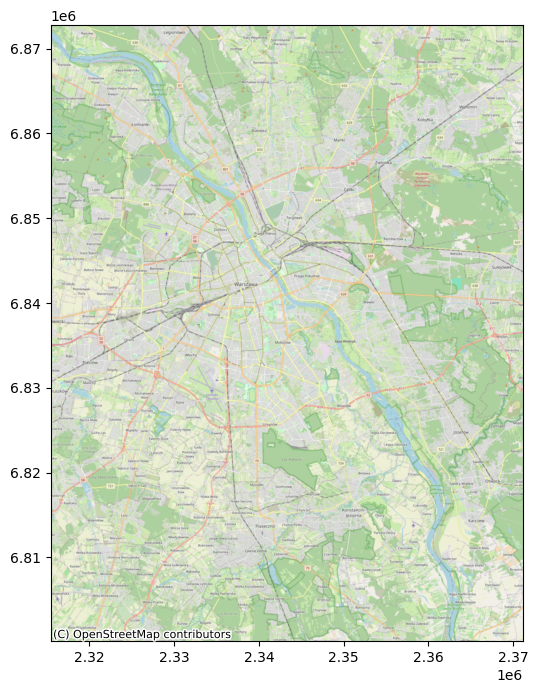

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point
import requests

# Funkcja do pobierania danych pogodowych
def get_weather_data(lat, lon, start_date, end_date):
    url = f"https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date={start_date}&end_date={end_date}&hourly=temperature_2m&wind_speed_10m&wind_direction_10m"
    response = requests.get(url)
    data = response.json()
    return data

# Zakres współrzędnych dla Warszawy
lat_min, lat_max = 52.0, 52.4
lon_min, lon_max = 20.8, 21.3

# Ustalmy rozdzielczość siatki
lat_points = np.linspace(lat_min, lat_max, num=10)
lon_points = np.linspace(lon_min, lon_max, num=10)

# Tworzymy siatkę współrzędnych
grid_points = [(lat, lon) for lat in lat_points for lon in lon_points]

# Tworzymy GeoDataFrame do przechowywania punktów
points = [Point(lon, lat) for lat, lon in grid_points]
gdf = gpd.GeoDataFrame(geometry=points)

# Konwertujemy współrzędne geograficzne na metryczne
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs(epsg=3857)

# Tworzymy mapę
fig, ax = plt.subplots(figsize=(10, 8))

# Ustawiamy zakres osi
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Dodajemy mapę tła z odpowiednim poziomem zoomu
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, zoom=12)

# Dodajemy punkty z odcieniami kolorów odpowiadającymi temperaturom
temperatures = []
wind_directions = []
wind_speeds = []

for lat, lon in grid_points:
    data = get_weather_data(lat, lon, "2021-06-01", "2021-06-02")
    temperatures.append(data['hourly']['temperature_2m'])
    wind_directions.append(data['wind_direction_10m'])
    wind_speeds.append(data['hourly']['wind_speed_10m'])

# # Konwertujemy kierunek i prędkość wiatru na składowe x i y dla strzałek
# u = np.cos(np.radians(wind_directions)) * wind_speeds
# v = np.sin(np.radians(wind_directions)) * wind_speeds

# # Rysujemy strzałki
# ax.quiver([point.x for point in gdf.geometry], [point.y for point in gdf.geometry], 
#           u, v, color='blue')

# # Dodajemy punkty z temperaturami
# sc = ax.scatter([point.x for point in gdf.geometry], [point.y for point in gdf.geometry], 
#                 c=temperatures, cmap='coolwarm', s=1000, alpha=0.4, marker='s')

# # Dodajemy legendę
# cbar = plt.colorbar(sc, ax=ax)
# cbar.set_label('Temperatura (°C)')

# # Dodajemy tytuł i etykiety
# plt.title("Mapa Warszawy z oznaczeniem temperatur i kierunku wiatru")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")

# plt.show()
